<a href="https://colab.research.google.com/github/abelowska/eegML/blob/main/Classes_02_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple linear regression

Using an open source [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) we're going to predict diabetes progression based on BMI scores with simple linear regression. The dataset is provided by `sklearn`'s [datasets](https://scikit-learn.org/stable/datasets.html) module which contains multiple datasets useful for studying and experimenting.

Imports

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

import io

### Load the [diabetes dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

In [4]:
diabets_data = datasets.load_diabetes(as_frame=True)

# Inspect the data

In [5]:
# read the description of dataset: the target and features
print(diabets_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
# get the features dataframe (denoted as X set)
diabetes_X_df = diabets_data.data
diabetes_X_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
diabetes_X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [8]:
# checking for Null Values
diabetes_X_df.isnull().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [9]:
diabetes_X_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [10]:
# get dataframe with target (denoted as y set)
diabetes_y_df = diabets_data.target
diabetes_y_df.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [11]:
# checking for Null Values
diabetes_y_df.isnull().sum()

0

In [12]:
diabetes_y_df.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

Notice, that X dataset is a `DataFrame` that consists of 10 columns (10 features) and y dataset is a `Series`. If you do not know how I knew where the data was and what parameters are worth checking out - look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes) :)

Now, let's look deeper inside the data:

In [13]:
# merge target and features into one dataframe
df = pd.DataFrame(diabetes_y_df).join(diabetes_X_df)
df.head()

,target,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,151.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,75.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,141.0,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,206.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,135.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [14]:
# create correlation matix
corr = df.corr()

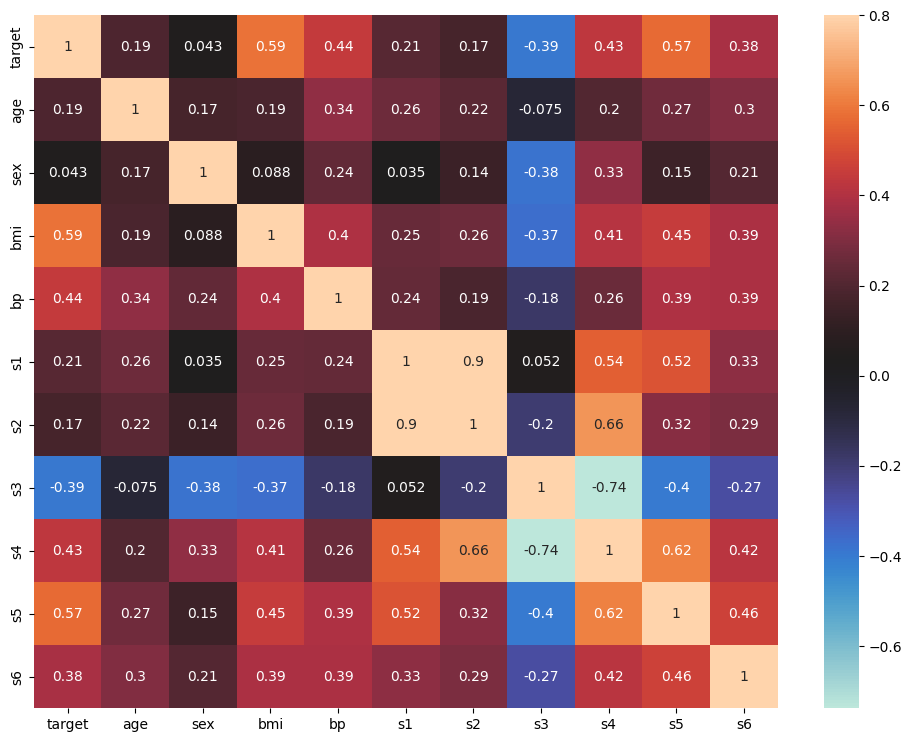

In [15]:
# plot matrix
plt.figure(figsize=(12,9))

sns.heatmap(
    corr,
    vmax=.8, 
    annot=True,
    cmap='icefire'
    )

plt.show()

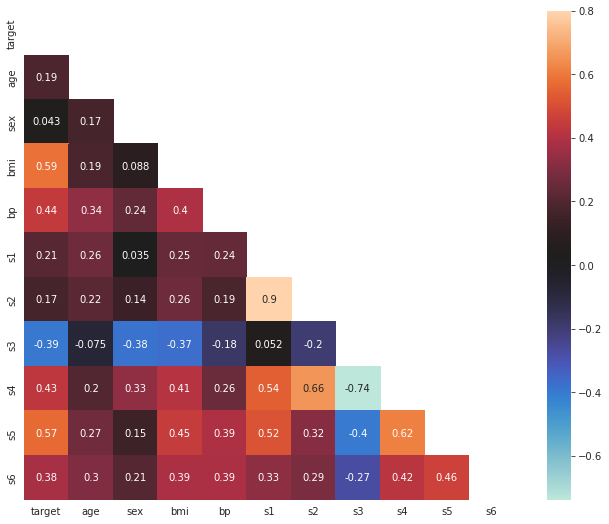

In [ ]:
# or plot only part of a matrix

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 9))
    ax = sns.heatmap(
        corr, 
        mask=mask, 
        vmax=.8, 
        square=True,
        annot=True,
        cmap='icefire'
        )

Answer a few questions:

* Is the data numerical or categorical?
* How many features does the dataset have?
* How is a tabular dataset organized?
  - a. a column represents a sample and a row represents a feature;
  - b. a column represents a feature and a row represents a sample;

And:
* Show a few samples of the data;
* Plot histograms for the numerical features;


**Now, let's look at whether we can predict the progression of diabetes (target) based on body mass index (BMI).**

# Model data

## Create the model object

To perform linear regression we will use the model provided by sci-kit Learn library: [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression). Now, we will use this model with it's default parametes, but again, reading the documentation is more than welcome.



In [16]:
lin_regressor = linear_model.LinearRegression()
lin_regressor

LinearRegression()

We can see that, as we expected, `lin_regressor` is simply an object of the [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) class, not fitted to the data yet. Fitting data to the model is done using the [`fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method.

To fit model to the data, we need to know in what format does the model expect the data to be. Let's see to the documentation of [`fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) method. We can also do this from the notebook.

In [17]:
lin_regressor.fit()

TypeError: LinearRegression.fit() missing 2 required positional arguments: 'X' and 'y'

## Prepare data

To perform a linear regression for a single variable, we need to select one feature from a data frame consisting of features. Then, we have to cast data to array-like data format. So let's extract the BMI from the `diabetes_X_df`.

In [19]:
# view df
diabetes_X_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [18]:
# select bmi colum and transform to np.array and reshape to (n_samples, n_features)
# now we have the so-called vector of features 
X = diabetes_X_df["bmi"].to_numpy().reshape(-1,1)
X.shape

(442, 1)

**Answer the question:** where does the (-1,1) come from?

In [20]:
# transform target set to np.array and ensure the shape (n_samples)
y = diabetes_y_df.to_numpy()
print(y.shape)

(442,)


### Train-test split

When building a machine learning model, it is important to evaluate the trained model on data that was not used to fit it, as generalization is more than memorization (meaning we want a rule that generalizes to new data, without comparing to data we memorized). It is harder to conclude on never-seen instances than on already seen ones.

To check the predictive performance of our model, we want to split out data to train and test sets, fit the model only to train set and then validate goodness of our model on the test set.

We can do this manually selecting subset of our data, or using a dedicated sci-kit learn method. Below you can find both versions.

#### Splitting the data manually


In [21]:
# we want to split data in the proportion 2:8
test_size = int(0.2*len(y))
print(f"Size of the test set: {test_size}")

## split the X data into training/testing sets
diabetes_X_train = X[:-test_size]
diabetes_X_test = X[-test_size:]

print(f"Shape of the X train dataset: {diabetes_X_train.shape}")
print(f"Shape of the X test dataset: {diabetes_X_test.shape}")

## split the targets into training/testing sets
diabetes_y_train = y[:-test_size]
diabetes_y_test = y[-test_size:]

print(f"Shape of the y train dataset: {diabetes_y_train.shape}")
print(f"Shape of the y test dataset: {diabetes_y_test.shape}")

Size of the test set: 88
Shape of the X train dataset: (354, 1)
Shape of the X test dataset: (88, 1)
Shape of the y train dataset: (354,)
Shape of the y test dataset: (88,)


#### Splitting the data using train-test split method

In [22]:
# to ensure repeatability of splits, we set the random state
# random state (read more: https://en.wikipedia.org/wiki/Random_seed) is used 
# whenever we want to have repeatable results of an operation that involves
# a pseudo-random operation, e.g. picking "random" samples from a set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(f"Shape of the X train dataset: {X_train.shape}")
print(f"Shape of the X test dataset: {X_test.shape}")
print(f"Shape of the y train dataset: {y_train.shape}")
print(f"Shape of the y test dataset: {y_test.shape}")

Shape of the X train dataset: (353, 1)
Shape of the X test dataset: (89, 1)
Shape of the y train dataset: (353,)
Shape of the y test dataset: (89,)


## Fit the model to the data

Now we can train the model using the training sets:


In [24]:
lin_regressor.fit(X_train, y_train)

LinearRegression()

## Test model

Predict progression of diabetes based on unseen BMI observations from the test sets with [`predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) method:

In [25]:
diabetes_y_pred = lin_regressor.predict(X_test)

Calculate $R^2$, $MAE$ and $MSE$

In [26]:
# The coefficient of determination: 1 is perfect prediction
print(f"Coefficient of determination: {r2_score(y_test, diabetes_y_pred)}")

Coefficient of determination: 0.23335039815872138


In [27]:
# The mean absolute error
print(f"Mean absolute error: {mean_absolute_error(y_test, diabetes_y_pred)}")

Mean absolute error: 52.25997644534553


In [28]:
# The mean squared error
print(f"Mean squared error: {mean_squared_error(y_test, diabetes_y_pred)}")

Mean squared error: 4061.8259284949268


It's impossible to interpret $MAE$ and $MSE$ scores standalone. As they reflect the units of data being analysed, we can check mean and standard deviation of target data, to compare $MAE$ and $MSE$ scores with properties of target set.

In [29]:
print(f"Mean progression of diabets: {np.mean(diabetes_y_pred)}")
print(f"One standard deviation of progression of diabets: {np.std(diabetes_y_pred)}")
print(f"Squared standard deviation of progression of diabets: {np.std(diabetes_y_pred)**2}")

Mean progression of diabets: 145.12901755955954
One standard deviation of progression of diabets: 48.27640999586261
Squared standard deviation of progression of diabets: 2330.611762088623


Now, we can quite clearly see that our $MAE$ excess one $STD$, thus is quite large. In other words, our prediction may be wrong by more than one standard deviation. Nonetheless, there is no straightforward way to interpret mean error metrics. They are more usefull when comparing different models.

## Plot results

Now, as we are the most decent data scientist, we going to store our results in df. This also makes it very easy to draw charts using the [`Seaborn`](https://seaborn.pydata.org) library. 

In [30]:
prediction_results_df = pd.DataFrame({ 
    "X_test": X_test.reshape(-1),
    "y_real": y_test,
    "y_pred": diabetes_y_pred,   
})

prediction_results_df

,X_test,y_real,y_pred
0,-0.006206,219.0,145.806227
1,0.036907,70.0,188.857390
2,-0.004050,202.0,147.958785
3,0.051996,230.0,203.925298
4,-0.020218,111.0,131.814599
...,...,...,...
84,-0.065486,153.0,86.610877
85,-0.025607,98.0,126.433203
86,-0.063330,37.0,88.763435
87,-0.069797,63.0,82.305761


Plot predicted vs real data


[]

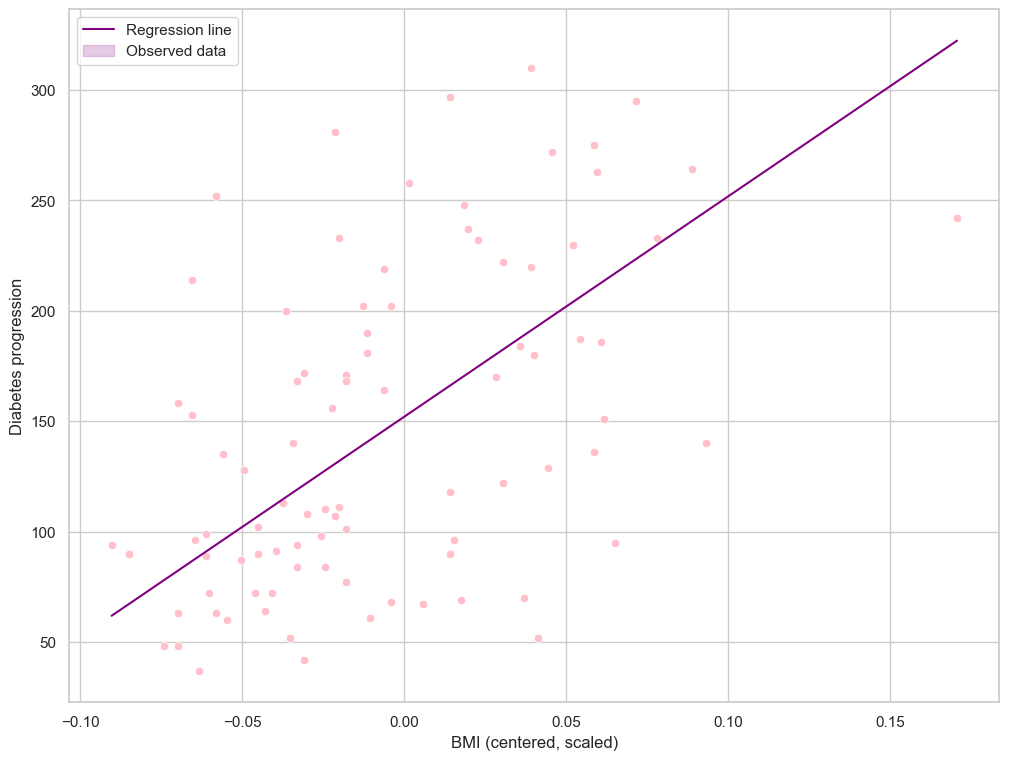

In [31]:
# set seaborn theme
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12,9))

# draw lineplot for predicted data 
s = sns.lineplot(data=prediction_results_df, x="X_test", y="y_pred", color="purple")

# draw observed (real) data as point plot
sns.scatterplot(data=prediction_results_df, x="X_test", y="y_real", color="pink")

# add legend to the plot
plt.legend(labels=["Regression line","Observed data"])

# change axes labels
s.set( xlabel = "BMI (centered, scaled)", ylabel = "Diabetes progression")

plt.plot()

# And voilà!

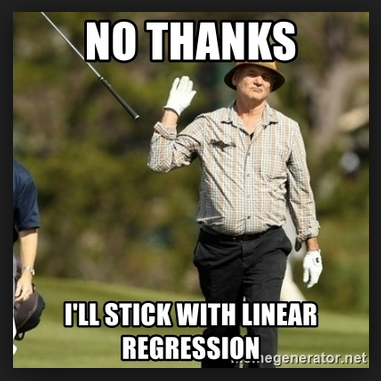

# Notebook Recap

In this notebook we:

- fitted a linear regression model on a training dataset;
- evaluated its generalization performance on the testing data;
- introduced the scikit-learn API `.fit(X, y)` (to train a model), `.predict(X)` (to make predictions);
- used `r2_score(predicted, y)`, `mean_absolute_error(predicted, y)` and `mean_absolute_error(predicted, y)` to evaluate model performance. 

# Exercise

# Life Expectancy with Simple Linear Regression

*   Download [Life Expectancy Data](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) from Kaggle. After downloading it should be .zip dir that consists of `Live Expectancy Data.csv` file. Note: [Kaggle](https://www.kaggle.com) is a place where data science/machine learning contests are held and you can find interesting datasets there.
*   Read the data using code below.
*   Predict *Alcohol* consumption based on *GDP* values using Linear Regression model from sci-kit Learn.



## Load the Life Expectancy Dataset

In [36]:
# To upload from your local drive, start with the following code. 
# It will prompt you to select a file. Click on “Choose Files” 
# then select and upload the .csv file you downloaded. 

#from google.colab import files
#uploaded = files.upload()

In [43]:
# make sure the filename matches the name of the uploaded file 
life_expectancy_data = pd.read_csv("life_expectancy_data.csv")
life_expectancy_df = life_expectancy_data.copy()

### Inspect data

In [45]:
life_expectancy_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [46]:
life_expectancy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [47]:
life_expectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [48]:
# checking for null values
life_expectancy_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [49]:
# delete missing/empty observations
life_expectancy_df = life_expectancy_df.dropna()            

In [50]:
# checking again for null values
life_expectancy_df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

Mind, that after dropping some rows, the size of dataset changed.

As an alternative to deleting missing observations, the empty cells can be filled with the expected (mean) value of the data series:

 ``` 
 life_expectancy_df = life_expectancy_data.copy()
 life_expectancy_df.fillna(life_expectancy_df.mean(), inplace=True)
 ```
 This forces pandas to fill the cells with NaN using column mean.

In [51]:
# create correlation matix
corr = life_expectancy_df.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_98156\907073229.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = life_expectancy_df.corr()


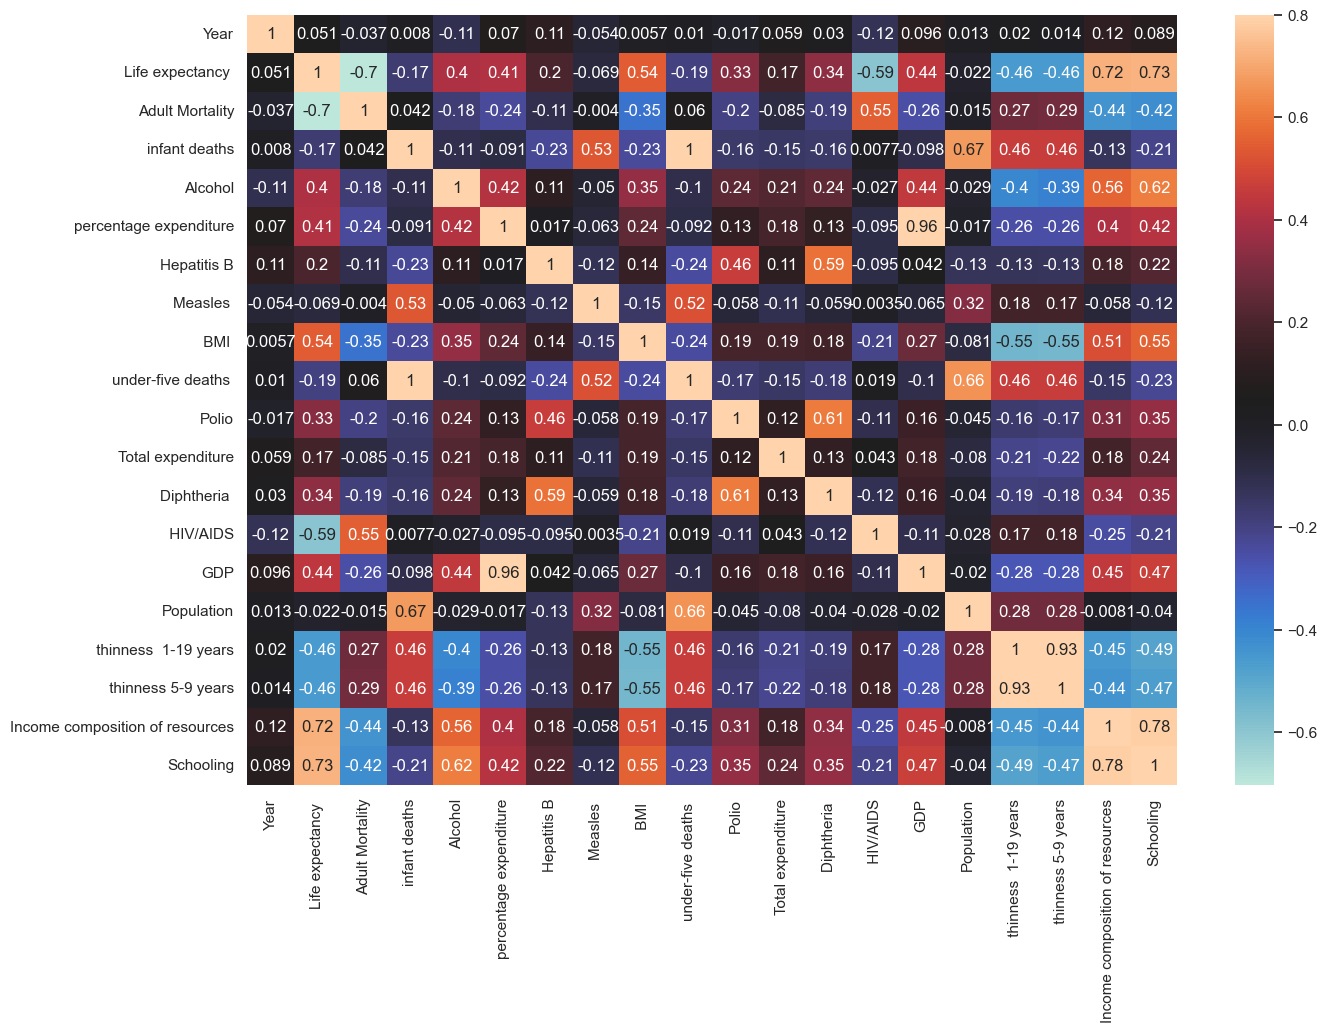

In [52]:
# plot matrix
plt.figure(figsize=(15,10))

sns.heatmap(
    corr,
    vmax=.8, 
    annot=True,
    cmap='icefire'
    )

plt.show()

## Prepare data

In [53]:
# select column 'GDP' as X dataset and cast to np.array
# then reshape data to (n_samples, n_features)

## your code goes here...
X = life_expectancy_df["GDP"].to_numpy().reshape(-1,1)

In [54]:
# select column 'Alcohol' as y dataset and cast to np.array
y = life_expectancy_df["Alcohol"].to_numpy()
## your code goes here...

In [55]:
# train-test split in ratio 8:2

## your code goes here...

# we want to split data in the proportion 8:2
test_size = int(0.8*len(y))
print(f"Size of the test set: {test_size}")

## split the X data into training/testing sets
life_expectancy_X_train = X[:-test_size]
life_expectancy_X_test = X[-test_size:]

print(f"Shape of the X train dataset: {life_expectancy_X_train.shape}")
print(f"Shape of the X test dataset: {life_expectancy_X_test.shape}")

## split the targets into training/testing sets
life_expectancy_y_train = y[:-test_size]
life_expectancy_y_test = y[-test_size:]

print(f"Shape of the y train dataset: {life_expectancy_y_train.shape}")
print(f"Shape of the y test dataset: {life_expectancy_y_test.shape}")

Size of the test set: 1319
Shape of the X train dataset: (330, 1)
Shape of the X test dataset: (1319, 1)
Shape of the y train dataset: (330,)
Shape of the y test dataset: (1319,)


## Fit the model

In [2]:
# create LinearRegression object

## your code goes here...
lin_regressor = linear_model.LinearRegression()
lin_regressor

NameError: name 'linear_model' is not defined

In [1]:
# and fit it to train data

## your code goes here...
lin_regressor.fit(X_train, y_train)

NameError: name 'lin_regressor' is not defined

## Test the model

* print R^2, MAE and MSE of predicted data.
* create linear and scatter plot that shows predicted vs real data.

In [59]:
## your code goes here...
life_expectancy_y_pred = lin_regressor.predict(X_test)

In [60]:
print(f"Coefficient of determination: {r2_score(y_test, life_expectancy_y_pred)}")

Coefficient of determination: 0.23335039815872138


In [61]:
print(f"Mean squared error: {mean_squared_error(y_test, life_expectancy_y_pred)}")

Mean squared error: 4061.8259284949268


In [62]:
print(f"Mean absolute error: {mean_absolute_error(y_test, life_expectancy_y_pred)}")

Mean absolute error: 52.25997644534553


In [63]:
prediction_results_df = pd.DataFrame({ 
    "X_test": X_test.reshape(-1),
    "y_real": y_test,
    "y_pred": life_expectancy_y_pred,   
})

prediction_results_df

,X_test,y_real,y_pred
0,-0.006206,219.0,145.806227
1,0.036907,70.0,188.857390
2,-0.004050,202.0,147.958785
3,0.051996,230.0,203.925298
4,-0.020218,111.0,131.814599
...,...,...,...
84,-0.065486,153.0,86.610877
85,-0.025607,98.0,126.433203
86,-0.063330,37.0,88.763435
87,-0.069797,63.0,82.305761


[]

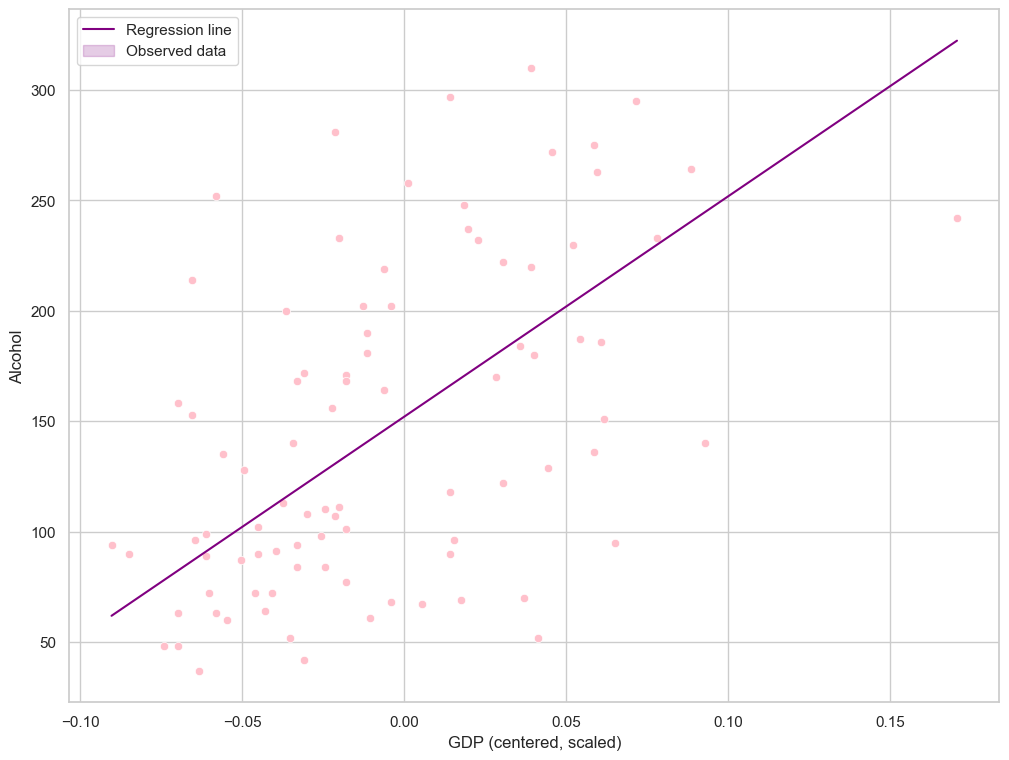

In [64]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12,9))

# draw lineplot for predicted data 
s = sns.lineplot(data=prediction_results_df, x="X_test", y="y_pred", color="purple")

# draw observed (real) data as point plot
sns.scatterplot(data=prediction_results_df, x="X_test", y="y_real", color="pink")

# add legend to the plot
plt.legend(labels=["Regression line","Observed data"])

# change axes labels
s.set( xlabel = "GDP (centered, scaled)", ylabel = "Alcohol")

plt.plot()